In [182]:

import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report


In [183]:
titanic_file_path = "./titanic.csv"
titanic_data = pd.read_csv(titanic_file_path)
#print(titanic_data.head(5))
print("Shape of dataset:",titanic_data.shape)
print("Dataset of data:", titanic_data.info())

Shape of dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Dataset of data: None


DATA CLEANING

In [184]:
titanic_data["Age"] = titanic_data["Age"].fillna(titanic_data["Age"].median())

# Cabin – Categorical (fill with "Unknown Cabin")
titanic_data['Cabin'] = titanic_data['Cabin'].fillna("Unknown Cabin")
missing_data2 = titanic_data.isnull().sum()

print(missing_data2)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


DATA EXPLORATION

Survived    0    1
Sex               
female     81  233
male      468  109
The data shows that Out of all passengers, more females survived than males on the Titanic.



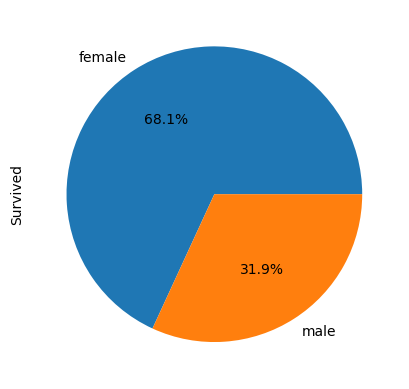

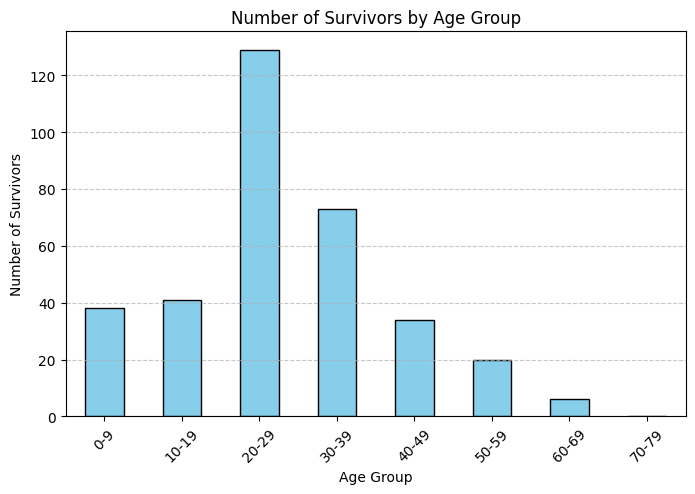

This data shows that people in the age group of 20-29 survived more than others


In [185]:
print(titanic_data.groupby(['Sex','Survived']).size().unstack(fill_value=0))
titanic_data.groupby('Sex')['Survived'].sum().plot(kind = 'pie',autopct='%1.1f%%')
print("The data shows that Out of all passengers, more females survived than males on the Titanic.\n")


bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=False)

# Step 2: Count survivors by Age Group
age_survival_counts = titanic_data.groupby('AgeGroup',observed=True)['Survived'].sum()

# Step 3: Plot bar chart
plt.figure(figsize=(8,5))
age_survival_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Step 4: Add labels and title
plt.title('Number of Survivors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 5: Show plot

plt.show()
print("This data shows that people in the age group of 20-29 survived more than others")


FEATURE EXTRACTION

In [186]:
titanic_data['Title'] = titanic_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

titanic_data["Deck"] = titanic_data["Cabin"].str[0]

titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1  # +1 for the passenger themselves
titanic_data['Deck'] = titanic_data['Deck'].fillna('Unknown')
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')
titanic_data['Title'] = titanic_data['Title'].fillna('Unknown')



DATA PREPROCESSING

In [187]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})


#X = pd.get_dummies(titanic_data, columns=['Embarked','Deck'])
categorical_cols = ['Embarked', 'Deck', 'Title']  # One-hot encode these
titanic_data = pd.get_dummies(titanic_data, columns=categorical_cols, drop_first=True)

FEATURE SELECTION

In [188]:

#Print out the target value to be predicted 
y = titanic_data.Survived
#Features of target to be predicted
X = titanic_data.drop(columns=['Survived','Name','Cabin','Ticket','AgeGroup'],errors='ignore')  # drop target & useless columns

DATA SPLIT

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)


LOG MODEL


In [190]:
log_model = LogisticRegression(random_state=1,max_iter=5000)
#fit the model 
log_model.fit(X_train, y_train)
#Prediction
log_y_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_y_pred)#
print("Accuracy for the logisticRegression:", log_accuracy)

Accuracy for the logisticRegression: 0.8100558659217877


Random Model

In [191]:
#Define The Model
rf_model = RandomForestClassifier(random_state=42)
#Fit the model
rf_model.fit(X_train, y_train)
#Prediction
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy for the RandomForestRegressor:",rf_accuracy )


Accuracy for the RandomForestRegressor: 0.8435754189944135


XGBOOST Model

In [192]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
#hprint(xgb_y_pred)
xgb_accuracy = accuracy_score(y_test, rf_y_pred)
print('XGBOOST ACCURACY:', xgb_accuracy)

XGBOOST ACCURACY: 0.8435754189944135


FEATURE PERFORMANCE

In [193]:
#print("Feature performance for log model")
log_coef = pd.Series(log_model.coef_[0], index=X_train.columns)
log_coef = log_coef.sort_values(key=abs, ascending=False)  # absolute effect
#print("Logistic Regression Feature Coefficients:\n", log_coef)

#print("Feature performance for RandomForest model")
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)
#print(feature_importance)

#print("Feature performance for XGBOOSTmodel")
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_importance = xgb_importance.sort_values(ascending=False)
#print("XGBoost Feature Importance:\n", xgb_importance)


FEATURE SELECTION

In [194]:
#For Log Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#For RandomForest MOdel
top_features = feature_importance.head(10).index
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

RETRAINED LOG MODEL

In [195]:
# LogisticRegression
log_model.fit(X_train_scaled, y_train)
y_pred_log_top = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy (Top Features):", accuracy_score(y_test, y_pred_log_top))

f1_log = f1_score(y_test, y_pred_log_top)
print("Logistic Regression F1 Score:", f1_log)

cm_log = confusion_matrix(y_test, y_pred_log_top)
print("Confusion Matrix - Logistic Regression:\n", cm_log)

Logistic Regression Accuracy (Top Features): 0.8156424581005587
Logistic Regression F1 Score: 0.7785234899328859
Confusion Matrix - Logistic Regression:
 [[88 17]
 [16 58]]


RETRAINED RANDOM MODEL

In [ ]:
# RandomForest
rf_model.fit(X_train_top, y_train)
y_pred_rf_top = rf_model.predict(X_test_top)
print("RandomForest Accuracy (Top Features):", accuracy_score(y_test, y_pred_rf_top))

f1_rf = f1_score(y_test, y_pred_rf_top)
print("Random Forest F1 Score:", f1_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf_top)
print("Confusion Matrix - Random Forest:\n", cm_rf)

RETRAINED XGBOOST MODEL

In [ ]:
# XGBoost
xgb_model.fit(X_train_top, y_train)
y_pred_xgb_top = xgb_model.predict(X_test_top)
print("XGBoost Accuracy (Top Features):", accuracy_score(y_test, y_pred_xgb_top))

f1_xgb = f1_score(y_test, y_pred_xgb_top)
print("XGBoost F1 Score:", f1_xgb)

cm_xgb = confusion_matrix(y_test, y_pred_xgb_top)
print("Confusion Matrix - XGBoost:\n", cm_xgb)

PERFORMANCE OF MODELS

In [197]:
#Performance between models
print("\nModel Comparison:")
print(f"Logistic Regression: {log_accuracy:.4f}")
print(f"Random Forest      : {rf_accuracy:.4f}")
print(f"XGBoost            : {xgb_accuracy:.4f}")


Model Comparison:
Logistic Regression: 0.8101
Random Forest      : 0.8436
XGBoost            : 0.8436
